---
title: "Analyze Movie Reviews with NLP"
date: 2019-10-23
tags: [machine learning, data sciece, natural language processing]
excerpt: "Natural Language Processing, Machine Learning, Data Science"
---

# Analyze Movie Reviews

Natural Language Processing (NLP)
This project aims to analyze movie review and to define whether it is positive or negative using Natural Language Processing (NLP). I used `nltk` Python package for NLP. 
I used the dataset *movie_review* that included in the package `nltk`. This dataset is divided into two parts neg and pos. Also, each file has a unique id.

## Inspect the Movie Reviews Dataset

In [1]:
import nltk

In [2]:
nltk.download("movie_reviews")

[nltk_data] Error loading movie_reviews: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


False

In [3]:
from nltk.corpus import movie_reviews

In [4]:
len(movie_reviews.fileids())

2000

The dataset has **2000** movie reviews

In [5]:
movie_reviews.fileids()[:5]

['neg/cv000_29416.txt',
 'neg/cv001_19502.txt',
 'neg/cv002_17424.txt',
 'neg/cv003_12683.txt',
 'neg/cv004_12641.txt']

In [6]:
movie_reviews.fileids()[-5:]

['pos/cv995_21821.txt',
 'pos/cv996_11592.txt',
 'pos/cv997_5046.txt',
 'pos/cv998_14111.txt',
 'pos/cv999_13106.txt']

In [7]:
negative_fileids = movie_reviews.fileids('neg')
positive_fileids = movie_reviews.fileids('pos')

In [8]:
len(negative_fileids), len(positive_fileids)

(1000, 1000)

The number of positive and negative reviews is 1000.

We can inspect one of the reviews using the `raw` method of `movie_reviews`, each file is split into sentences, the curators of this dataset also removed from each review from any direct mention of the rating of the movie.

**One example of positive review**

In [9]:
print(movie_reviews.raw(fileids=positive_fileids[0]))

films adapted from comic books have had plenty of success , whether they're about superheroes ( batman , superman , spawn ) , or geared toward kids ( casper ) or the arthouse crowd ( ghost world ) , but there's never really been a comic book like from hell before . 
for starters , it was created by alan moore ( and eddie campbell ) , who brought the medium to a whole new level in the mid '80s with a 12-part series called the watchmen . 
to say moore and campbell thoroughly researched the subject of jack the ripper would be like saying michael jackson is starting to look a little odd . 
the book ( or " graphic novel , " if you will ) is over 500 pages long and includes nearly 30 more that consist of nothing but footnotes . 
in other words , don't dismiss this film because of its source . 
if you can get past the whole comic book thing , you might find another stumbling block in from hell's directors , albert and allen hughes . 
getting the hughes brothers to direct this seems almost as 

Good news is that the `movie_reviews` corpus already has direct access to tokenized text with the `words` method. Therefore, we don't need to tokenize text.

In [10]:
movie_reviews.words(fileids=positive_fileids[0])

['films', 'adapted', 'from', 'comic', 'books', 'have', ...]

## Build a bag-of-words model

The simplest model for analyzing text is just to think about text as an unordered collection of words (bag-of-words). This can generally allow to infer from the text the category, the topic or the sentiment.

From the bag-of-words model we can build features to be used by a classifier, here we assume that each word is a feature that can either be `True` or `False`.
We implement this in Python as a dictionary where for each word in a sentence we associate `True`, if a word is missing, that would be the same as assigning `False`.

Punctuations like "!" and words like "of" or "that" are useless for classification purposes and we need to remove them from texts.
Those words are named "stopwords" and `nltk` has a convenient corpus we can download:

In [11]:
nltk.download("stopwords")

[nltk_data] Error loading stopwords: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1056)>


False

We take punctuations from library string.

In [12]:
import string

In [13]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [14]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Using the Python `string.punctuation` list and the English stopwords we can build better features by filtering out those words that would not help in the classification:

In [15]:
useless_words = nltk.corpus.stopwords.words("english") + list(string.punctuation)

print(type(useless_words))

<class 'list'>


Through selecting, we don't take useless words. Then we make a dictionary using remaining words.

In [16]:
def build_bag_of_words_features_filtered(words):
    return {
        word:1 for word in words \
        if not word in useless_words}

## Plotting Frequencies of Words

Before starting the analysis, we will find the most common words and plot their frequency.

Using the `.words()` function with no argument we can extract the words from the entire dataset and check that it is about 1.6 millions.

In [17]:
all_words = movie_reviews.words()
len(all_words)/1e6

1.58382

First we want to filter out `useless_words` as defined before, this will reduce the length of the dataset by more than a factor of 2:

In [18]:
filtered_words = [word for word in movie_reviews.words() if not word in useless_words]

In [19]:
len(filtered_words)/1e6

0.710579

The `collection` package of the standard library contains a `Counter` class that is handy for counting frequencies of words in our list:

In [20]:
from collections import Counter

word_counter = Counter(filtered_words)

We use `most_common()` method of *Counter* object to access the words with the higher count:

In [21]:
most_common_words = word_counter.most_common(10)

In [22]:
most_common_words

[('film', 9517),
 ('one', 5852),
 ('movie', 5771),
 ('like', 3690),
 ('even', 2565),
 ('good', 2411),
 ('time', 2411),
 ('story', 2169),
 ('would', 2109),
 ('much', 2049)]

## Visualization

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

We can sort the word counts and plot their values on Logarithmic axes to check the shape of the distribution. This visualization is particularly useful if comparing 2 or more datasets, a flatter distribution indicates a large vocabulary while a peaked distribution a restricted vocabulary often due to a focused topic or specialized language.

In [25]:
sorted_word_counts = sorted(list(word_counter.values()), reverse=True)

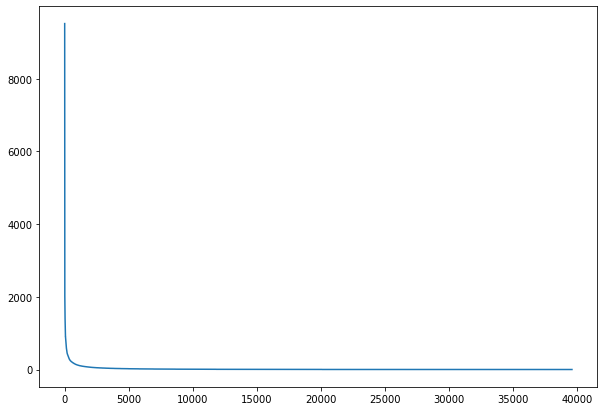

In [26]:
plt.figure(figsize=(10,7))
plt.plot(sorted_word_counts)

With this graph, it is hard to see trends. So, we make a plot with **log** scaling on both the x and y axis.

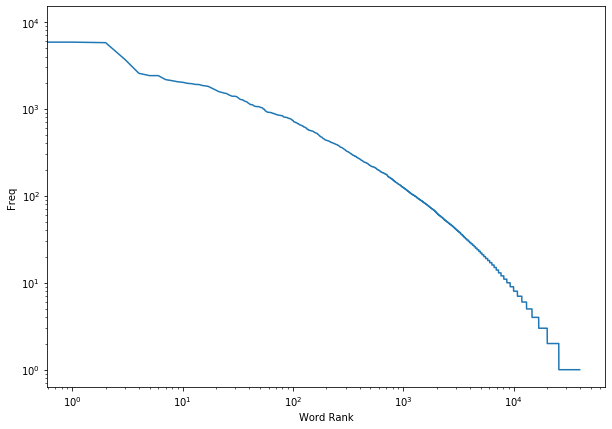

In [28]:
plt.figure(figsize=(10,7))
plt.loglog(sorted_word_counts)
plt.ylabel("Freq")
plt.xlabel("Word Rank");

Another related plot is the histogram of `sorted_word_counts`, which displays how many words have a count in a specific range.

(array([3.897e+04, 3.610e+02, 1.170e+02, 4.300e+01, 4.000e+01, 1.500e+01,
        9.000e+00, 8.000e+00, 5.000e+00, 4.000e+00, 6.000e+00, 2.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00000e+00, 1.91320e+02, 3.81640e+02, 5.71960e+02, 7.62280e+02,
        9.52600e+02, 1.14292e+03, 1.33324e+03, 1.52356e+03, 1.71388e+03,
        1.90420e+03, 2.09452e+03, 2.28484e+03, 2.47516e+03, 2.66548e+03,
        2.85580e+03, 3.04612e+03, 3.23644e+03, 3.42676e+03, 3.61708e+03,
        3.80740e+03, 3.99772e+03, 4.18804e+03, 4.37836e+03, 4.56868e+03,
        4.7

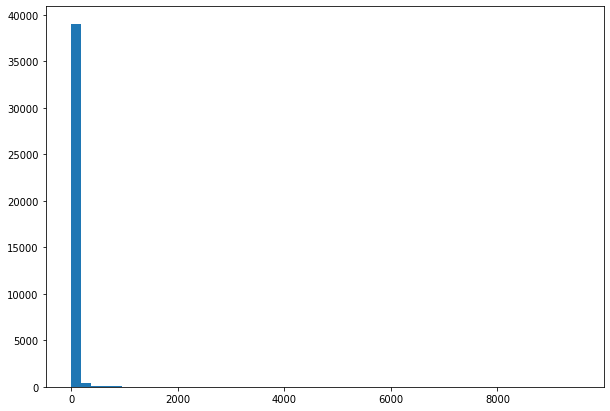

In [30]:
plt.figure(figsize=(10,7))
plt.hist(sorted_word_counts, bins=50)

We use a log scaling again

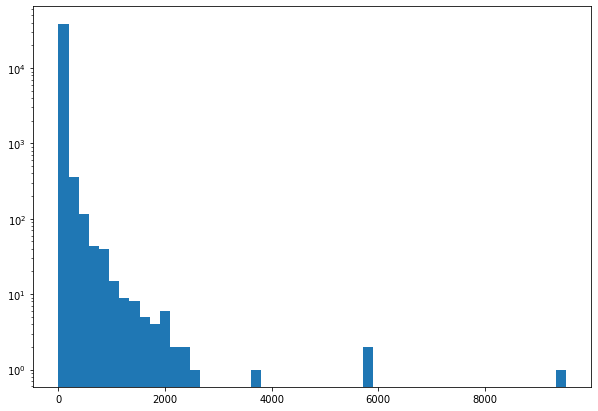

In [31]:
plt.figure(figsize=(10,7))
plt.hist(sorted_word_counts, bins=50, log=True);

## Train a Classifier for Sentiment Analysis

Using our `build_bag_of_words_features` function we can build separately the negative and positive features.
Basically for each of the 1000 negative and for the 1000 positive review, we create one dictionary of the words and we associate the label "neg" and "pos" to it.

In [33]:
negative_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'neg') \
    for f in negative_fileids
]

In [34]:
print(negative_features[3])

({'quest': 1, 'camelot': 1, 'warner': 1, 'bros': 1, 'first': 1, 'feature': 1, 'length': 1, 'fully': 1, 'animated': 1, 'attempt': 1, 'steal': 1, 'clout': 1, 'disney': 1, 'cartoon': 1, 'empire': 1, 'mouse': 1, 'reason': 1, 'worried': 1, 'recent': 1, 'challenger': 1, 'throne': 1, 'last': 1, 'fall': 1, 'promising': 1, 'flawed': 1, '20th': 1, 'century': 1, 'fox': 1, 'production': 1, 'anastasia': 1, 'hercules': 1, 'lively': 1, 'cast': 1, 'colorful': 1, 'palate': 1, 'beat': 1, 'hands': 1, 'came': 1, 'time': 1, 'crown': 1, '1997': 1, 'best': 1, 'piece': 1, 'animation': 1, 'year': 1, 'contest': 1, 'pretty': 1, 'much': 1, 'dead': 1, 'arrival': 1, 'even': 1, 'magic': 1, 'kingdom': 1, 'mediocre': 1, '--': 1, 'pocahontas': 1, 'keeping': 1, 'score': 1, 'nearly': 1, 'dull': 1, 'story': 1, 'revolves': 1, 'around': 1, 'adventures': 1, 'free': 1, 'spirited': 1, 'kayley': 1, 'voiced': 1, 'jessalyn': 1, 'gilsig': 1, 'early': 1, 'teen': 1, 'daughter': 1, 'belated': 1, 'knight': 1, 'king': 1, 'arthur': 1, '

In [37]:
positive_features = [
    (build_bag_of_words_features_filtered(movie_reviews.words(fileids=[f])), 'pos') \
    for f in positive_fileids
]

In [38]:
print(positive_features[6])

({'apparently': 1, 'director': 1, 'tony': 1, 'kaye': 1, 'major': 1, 'battle': 1, 'new': 1, 'line': 1, 'regarding': 1, 'film': 1, 'american': 1, 'history': 1, 'x': 1, 'know': 1, 'details': 1, 'fight': 1, 'seems': 1, 'happy': 1, 'final': 1, 'product': 1, 'nearly': 1, 'removed': 1, 'name': 1, 'credits': 1, 'altogether': 1, 'heard': 1, 'kind': 1, 'thing': 1, 'happening': 1, 'makes': 1, 'wonder': 1, 'much': 1, 'input': 1, 'studio': 1, 'films': 1, 'produce': 1, 'found': 1, 'extremely': 1, 'good': 1, 'focused': 1, 'look': 1, 'touchy': 1, 'subject': 1, 'racism': 1, 'powerful': 1, 'charismatic': 1, 'performance': 1, 'edward': 1, 'norton': 1, 'hard': 1, 'believe': 1, 'two': 1, 'years': 1, 'since': 1, 'fantastic': 1, 'role': 1, 'primal': 1, 'fear': 1, 'starring': 1, 'making': 1, 'star': 1, 'one': 1, 'performers': 1, 'becomes': 1, 'character': 1, 'work': 1, 'best': 1, 'performances': 1, 'year': 1, 'plays': 1, 'young': 1, 'man': 1, 'named': 1, 'derek': 1, 'vinyard': 1, 'skinhead': 1, 'living': 1, '

In [39]:
from nltk.classify import NaiveBayesClassifier

We use 80% of the data to train a model and learn what words are generally associated with positive or with negative reviews.

In [40]:
split = 800

In [41]:
sentiment_classifier = NaiveBayesClassifier.train(positive_features[:split]+negative_features[:split])

We measure an accuracy of the remaining 20% of the data that wasn't used in training:

In [42]:
nltk.classify.accuracy(sentiment_classifier, positive_features[split:]+negative_features[split:])*100

71.75

Accuracy here is around 72% which is pretty good for such a simple model if we consider that the estimated accuracy for a person is about 80%.
We can also print the most informative features, i.e. the words that mostly identify a positive or a negative review. In other words, these words are most affected words to determine whether review is positive or negative.

In [43]:
sentiment_classifier.show_most_informative_features()

Most Informative Features
             outstanding = 1                 pos : neg    =     13.9 : 1.0
               insulting = 1                 neg : pos    =     13.7 : 1.0
              vulnerable = 1                 pos : neg    =     13.0 : 1.0
               ludicrous = 1                 neg : pos    =     12.6 : 1.0
             uninvolving = 1                 neg : pos    =     12.3 : 1.0
              astounding = 1                 pos : neg    =     11.7 : 1.0
                  avoids = 1                 pos : neg    =     11.7 : 1.0
             fascination = 1                 pos : neg    =     11.0 : 1.0
               affecting = 1                 pos : neg    =     10.3 : 1.0
                  darker = 1                 pos : neg    =     10.3 : 1.0
